# Bernstein-Vazirani Algorithm

In [17]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [18]:
secretnumber = '111000'

In [19]:
# Generalize code change
# change the circuit building box
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

In [20]:
# apply hadamard gate to first  6 bits

In [21]:
# circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber))) # Changes to generalize code
# for last bit add X gate  before hadamard gate
circuit.x(len(secretnumber)) # apply to the last qbuit
circuit.h(len(secretnumber)) # apply hadamard to the last qbuit
circuit.barrier()

In [22]:
# circuit.draw(output='mpl')

In [23]:
# bulid the box that content secret number
# for every one in the secret number, put cX gate

### cX gate

In [24]:
# circuit.cx(5,6) #101001 5th place has 1 
# circuit.cx(3,6) #101001 3rd place has 1 
# circuit.cx(0,6) #101001 oth place has 1

## Generalize box
for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))

In [25]:
circuit.barrier()

In [26]:
# circuit.draw(output='mpl')

In [27]:
circuit.h(range(len(secretnumber))) 

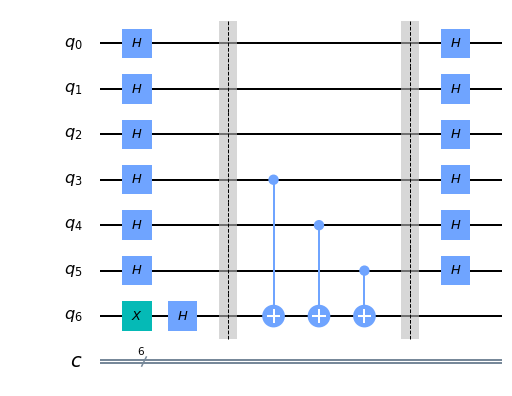

In [28]:
circuit.draw(output='mpl')

## Measurement

In [29]:
# Add measurement to understand how the circuit works.

In [30]:
circuit.barrier()

In [31]:
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

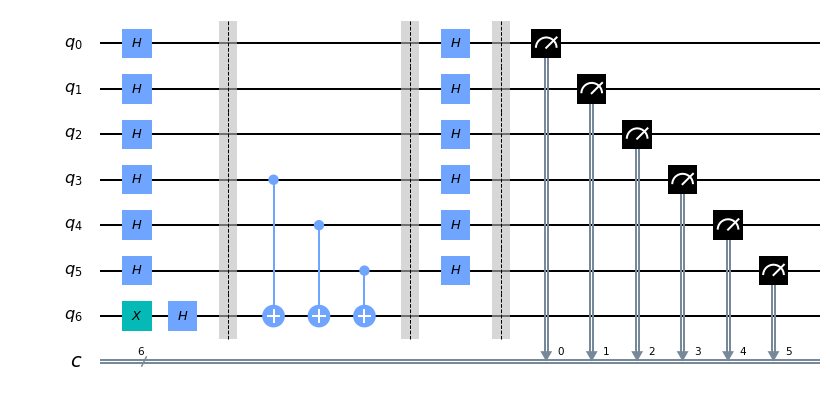

In [32]:
circuit.draw(output='mpl')

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend= simulator, shots=1).result()
counts = result.get_counts()
print(counts)